# Poisson Equation Solver
PoiSolver is a Finite Element Solver written in Python for Poisson equation. PoiSolver employes piecewise linear basis functions on uniform triangulation. It solves a Poisson equation on a two dimensional rectangular domain with homogeneous boundary conditions of Dirichlet type. We illustrate PoiSolver through an example in which we present both the relevant theory of the finite element method a long with the implementation for a given example.

In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
# import pyvista as pv

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib inline

xmax = 1
N = 60
X = np.linspace(0, xmax, N+1)
[x, y] = np.meshgrid(X, X)
x = np.reshape(x,x.size,order='C')
y = np.reshape(y,y.size,order='C')
NNODES = (N+1)**2
NTRI = 2*(N)**2
LNODES = np.zeros((NTRI,3),dtype=int)

for i in range(1,N+1):
    for j in range(1,N+1):
        LNODES[i+2*(j-1)*N-1,0] = i+(j-1)*(N+1)
        LNODES[i+2*(j-1)*N-1,1] = i+j*(N+1)
        LNODES[i+2*(j-1)*N-1,2] = (i+1)+(j-1)*(N+1)
        LNODES[i+N+2*(j-1)*N-1,0] = i+1+j*(N+1)
        LNODES[i+N+2*(j-1)*N-1,1] = (i+1)+(j-1)*(N+1)
        LNODES[i+N+2*(j-1)*N-1,2] = i+j*(N+1)
        
SP = np.ndarray((NNODES,NNODES))
LV = np.ndarray((NNODES,1))

for n in range(0,NTRI-1):
    r1 = np.array(([x[LNODES[n,0]],y[LNODES[n,0]]]))
    r2 = np.array(([x[LNODES[n,1]],y[LNODES[n,1]]]))
    r3 = np.array(([x[LNODES[n,2]],y[LNODES[n,2]]]))
    J = np.array(([r2[0]-r1[0],r2[1]-r1[1]],[r3[0]-r1[0],r3[1]-r1[1]]))
    Astiff = (1/(2*np.linalg.det(J)))*np.array(([np.dot(np.subtract(r2,r3),np.subtract(r2,r3)),
                        np.dot(np.subtract(r2,r3),np.subtract(r3,r1)),
                        np.dot(np.subtract(r2,r3),np.subtract(r1,r2))],
                        [np.dot(np.subtract(r2,r3),np.subtract(r3,r1)),
                        np.dot(np.subtract(r3,r1),np.subtract(r3,r1)),
                        np.dot(np.subtract(r3,r1),np.subtract(r1,r2))],
                        [np.dot(np.subtract(r2,r3),np.subtract(r1,r2)),
                        np.dot(np.subtract(r3,r1),np.subtract(r1,r2)),
                        np.dot(np.subtract(r1,r2),np.subtract(r1,r2))]))
    for i in range(0,2):
        for j in range(0,2):
            SP[LNODES[n,i],LNODES[n,j]]+=Astiff[i,j]
    ksi = 1/3
    eta = 1/3
    xx = (1-ksi-eta)*r1[0] + ksi * r2[0] + eta * r3[0]
    yy = (1-ksi-eta)*r1[1] + ksi * r2[1] + eta * r3[1]
    F = np.array(([(1-ksi-eta)*np.linalg.det(J)*1/2,
        ksi * np.linalg.det(J) * 1/2,
        eta * np.linalg.det(J) * 1/2]))
    for j in range(0,2):
        LV[LNODES[n,j]]+=F[j]
        
        
for i in range(0,NNODES):
    if x[i]==0 or y[i]==0 or x[i]==xmax or y[i]==xmax:
        LV[i] = 0
        SP[i,:]=0
        SP[i,i]=1
Z = np.linalg.solve(SP,LV)
Z  = Z.reshape((NNODES,)) 

R = np.exp(-(x**2 + y**2))
z = np.sin(np.pi*x)*np.sin(np.pi*y)



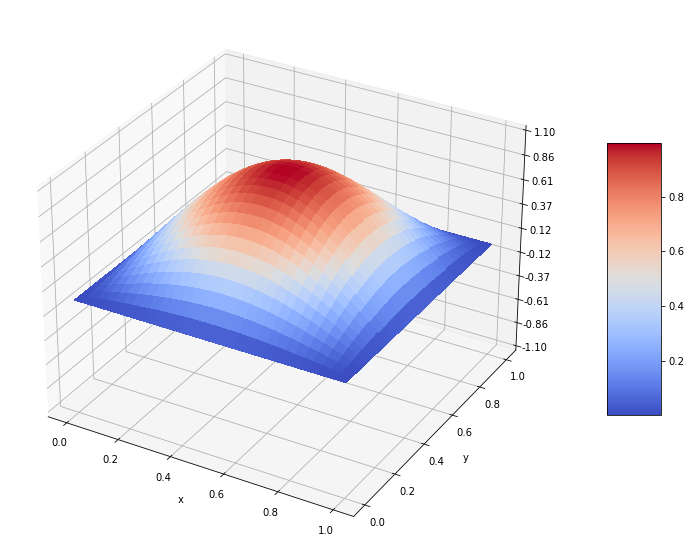

In [11]:
fig = plt.figure(figsize=(20,10))
# fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.gca(projection='3d')


xx = np.reshape(x,(N+1,N+1))
yy = np.reshape(y,(N+1,N+1))
zz = np.reshape(z,(N+1,N+1))
surf = ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-1.1, 1.1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('x')
plt.ylabel('y')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



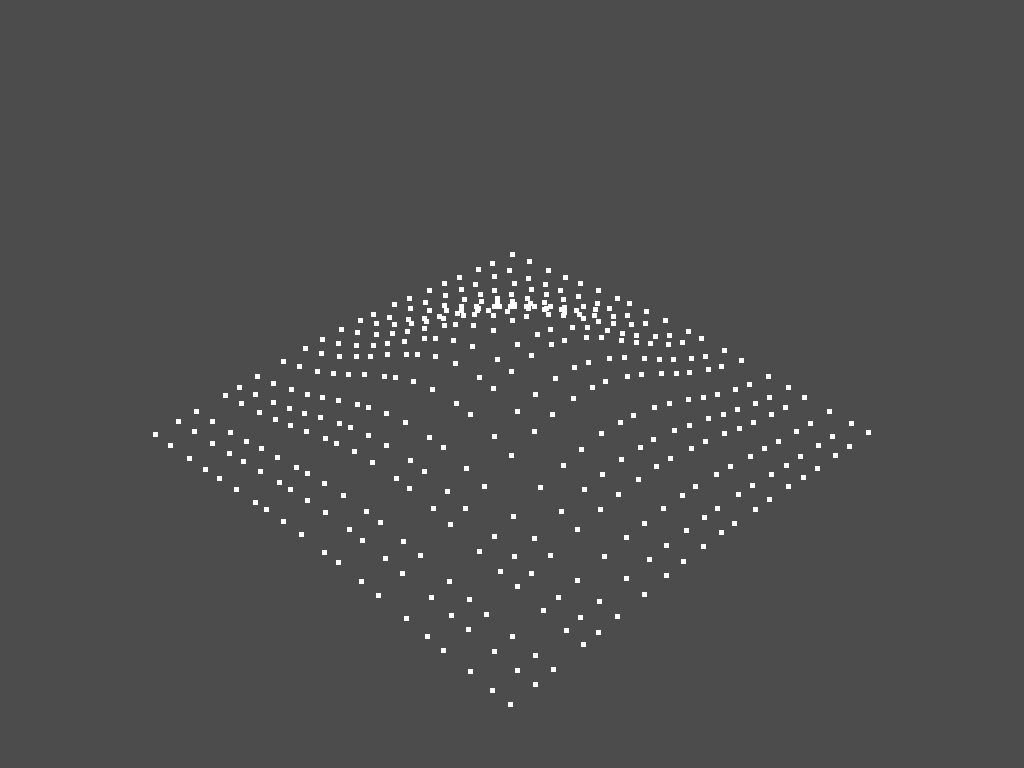

In [490]:
n = 20
x = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
y = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
xx, yy = np.meshgrid(x, y)
A, b = 100, 100
zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))

# Get the points as a 2D NumPy array (N by 3)
points = np.c_[xx.reshape(-1), yy.reshape(-1), zz.reshape(-1)]
cloud = pv.PolyData(points)
cloud.plot(point_size=5)

In [491]:
xx.shape

(20, 20)

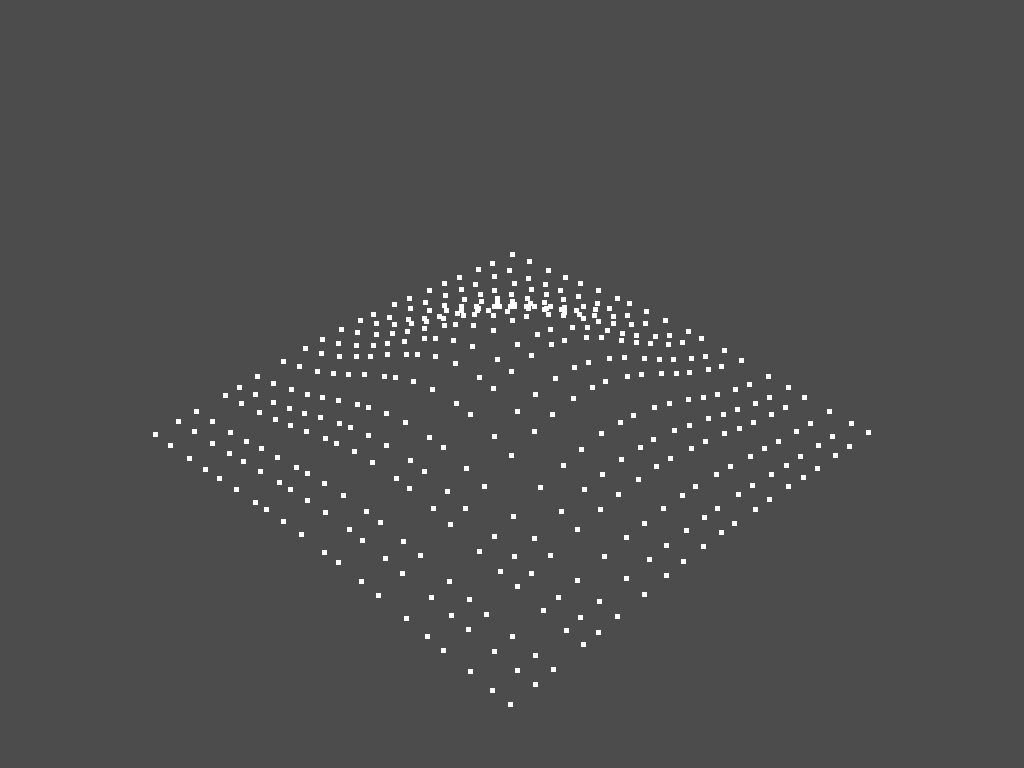

In [492]:
cloud = pv.PolyData(points)
cloud.plot(point_size=5)

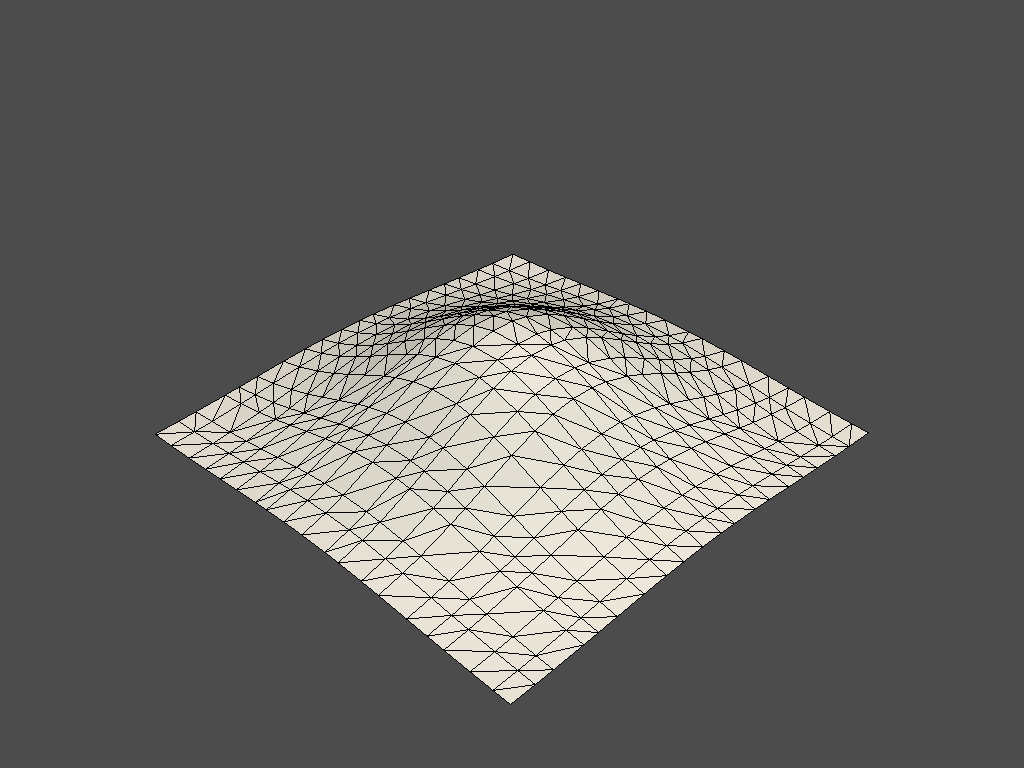

In [493]:
surf = cloud.delaunay_2d()
surf.plot(show_edges=True)

In [12]:
pwd

'/Users/wakilsarfaraz/Dropbox/GitHub/PoiSolverPy'